In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Overlap of ROSMAP datasets

In [2]:
clinical = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/metadata/ROSMAP_clinical.csv')

In [3]:
clinical

,projid,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,22207815,ROS,0.0,18.0,2.0,2.0,23.0,57.653661875427787,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R5306025
3580,22207941,ROS,0.0,16.0,2.0,2.0,34.0,56.651608487337441,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R6142763
3581,49333806,MAP,0.0,12.0,2.0,2.0,NaN,56.599589322381931,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,1.0,R4468842
3582,59720188,MAP,0.0,13.0,1.0,1.0,NaN,54.622861054072551,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R9446033


In [4]:
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort.h5ad')

In [5]:
diverse_cohort = diverse_cohort[~diverse_cohort.obs.projid.isna()]
diverse_cohort_barcodes = set(diverse_cohort.obs_names)
diverse_cohort_donors = set(diverse_cohort.obs.projid.unique())
diverse_cohort_donors = {str(int(v)) for v in diverse_cohort_donors}

In [6]:
del diverse_cohort

In [7]:
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
rosmap = rosmap[~rosmap.obs.projid.isna()]

In [9]:
rosmap_donors = set(rosmap.obs.projid.unique())
rosmap_donors = {str(int(v)) for v in rosmap_donors}

In [10]:
del rosmap

In [11]:
multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [12]:
multi_region_barcodes = set(multi_region.obs.obsnames)

In [13]:
multi_region_barcodes

{'TH_CTTCTCTAGGTAGTCG-43',
 'MT_GAGGGTAGTTGATGTC-21',
 'PFC_TGCTTGCTCCCATACC-22',
 'TH_GAATCGTTCTTCCAGC-13',
 'TH_TGACCCTAGCACCGAA-45',
 'PFC_TTCCTCTCATCTGGGC-35',
 'MT_TTACTGTGTTAAGCAA-13',
 'EC_GGGAGTAGTCATGACT-45',
 'HC_TTGAGTGCAGTAGTGG-46',
 'AG_GGGATGAAGTCGCCAC-10',
 'EC_AGTACCATCGCGTAGC-37',
 'PFC_ATTCACTCATGCGTGC-20',
 'PFC_TCATTCATCCATCTCG-47',
 'TH_AGGACTTGTCTTCAAG-32',
 'EC_CCTGCATAGTGTTCCA-22',
 'PFC_GTCATGACATGCCGAC-12',
 'AG_AGGAGGTAGGTCGAGT-38',
 'HC_CCTCACAGTATGGTAA-29',
 'TH_CCTTTGGTCGCTTTAT-35',
 'EC_GTAGGAGTCCCTCTCC-8',
 'HC_GAGTTGTCACTAGGTT-63',
 'TH_CTCCACAGTTGCCGCA-27',
 'AG_ACACTGATCTGTCGCT-17',
 'HC_CCACCTAGTACAGACG-16',
 'HC_AACCTTTCATACCACA-64',
 'TH_ATAGACCCATAGTCGT-21',
 'PFC_CACAACATCTCTTCAA-5',
 'MT_ACTCTCGAGATAGCTA-5',
 'TH_TGTTTGTTCTCCTGCA-9',
 'EC_GATAGAACAGCCGTTG-21',
 'EC_AGGGCTCGTGAATATG-46',
 'MT_TTCCTAACAATCTCGA-38',
 'PFC_CTCGGGAGTCGAGTTT-27',
 'TH_TCTGGCTGTCAGCTTA-15',
 'PFC_GTGACGCCATGTGGTT-34',
 'PFC_TGTAAGCAGCATTGTC-14',
 'AG_CAAGGGAGTTACGATC-4

In [14]:
multi_region_donors = set(multi_region.obs.projid.unique())
multi_region_donors = {str(int(v)) for v in multi_region_donors}

In [15]:
multi_region_donors

{'10291856',
 '10383017',
 '11259716',
 '11469504',
 '11619606',
 '11632851',
 '11681508',
 '12365619',
 '15413198',
 '15483818',
 '20151388',
 '20399274',
 '20584923',
 '20646778',
 '20780035',
 '20906079',
 '21001771',
 '21171080',
 '21272396',
 '31509843',
 '37030589',
 '37178462',
 '41773404',
 '50105301',
 '50106280',
 '50109639',
 '50301125',
 '50400709',
 '50403446',
 '50410319',
 '61827429',
 '62404688',
 '65652206',
 '66754397',
 '67429065',
 '68539908',
 '70625336',
 '70816595',
 '76733461',
 '77891596',
 '78452313',
 '82317494',
 '83034844',
 '86934089',
 '90780976',
 '91444029',
 '94430339',
 '98953007'}

In [16]:
del multi_region

In [17]:
aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data.h5ad')

In [21]:
aging_barcodes = set(aging.obs_names)

In [22]:
aging_donors = set(aging.obs.projid.unique())
aging_donors = {str(int(v)) for v in aging_donors}

In [23]:
aging_donors

{'10100574',
 '10100862',
 '10101291',
 '10101327',
 '10101589',
 '10102206',
 '10202345',
 '10203224',
 '10205244',
 '10222853',
 '10246987',
 '10248033',
 '10249336',
 '10253148',
 '10260309',
 '10261026',
 '10263208',
 '10271474',
 '10277308',
 '10288185',
 '10290265',
 '10290427',
 '10291856',
 '10292311',
 '10298957',
 '10300914',
 '10315029',
 '10345561',
 '10383017',
 '10394182',
 '10405008',
 '10435090',
 '10436131',
 '10438999',
 '10460587',
 '10473384',
 '10484873',
 '10490993',
 '10502798',
 '10510090',
 '10514454',
 '10516762',
 '10518782',
 '10536568',
 '10551157',
 '10557081',
 '10577337',
 '10669174',
 '10684501',
 '10866165',
 '10901987',
 '10929637',
 '11072071',
 '11157783',
 '11159965',
 '11165535',
 '11173549',
 '11200645',
 '11259716',
 '11302830',
 '11310718',
 '11310844',
 '11326252',
 '11327005',
 '11331231',
 '11336574',
 '11342432',
 '11345331',
 '11349119',
 '11371707',
 '11392518',
 '11395417',
 '11399321',
 '11399871',
 '11409232',
 '11413170',
 '11430815',

In [24]:
del aging

## check if overlap in barcodes

In [49]:
diverse_cohort_barcodes

{'VR080_CTCCAAACATGATTGT-1',
 'VR061_GGATTATGTCTTGCAT-1',
 'VR120_GATTACGGTACTTCAC-1',
 'VR064_ATGTAAGCATATAACC-1',
 'VR138_CTTCAATTCGGTTTCC-1',
 'VR086_GTCAATATCCTTGTTG-1',
 'VR028_GTTACAGGTATGGTGC-1',
 'VR145_CTGGACCAGGCGTAAA-1',
 'VR040_ATAGCATGTTTCCGGC-1',
 'VR024_AGTTACATCTTTGACT-1',
 'VR076_CAGTACCCAAGTCGCT-1',
 'VR060_CGCTTGCGTAAACAAG-1',
 'VR128_CTATAACCATGGTTAT-1',
 'VR052_GTGCGGTTCTGGCTTC-1',
 'VR080_CCTGTATGTCTAACCT-1',
 'VR106_AGAGATTAGCCACAAT-1',
 'VR098_TTCATCCCATTGTGCA-1',
 'VR123_TTATCCGTCAGCTAAC-1',
 'VR137_GCCATGATCGGGACCT-1',
 'VR023_AGATGAAGTTAGACCA-1',
 'VR127_CCTGTAACAGGTTAAA-1',
 'VR001_GGTTGCGGTCAAAGAA-1',
 'VR135_AAGAATCAGGCTCATG-1',
 'VR035_GTGATCAGTATTGTCC-1',
 'VR014_ACTAACTCAAGCTTAT-1',
 'VR131_CAAATCATCACTTCAT-1',
 'VR022_CAAACATGTCAAGTAT-1',
 'VR128_TGTGCGCAGGGCTTTG-1',
 'VR036_CCTAAAGGTCTAACCT-1',
 'VR075_AATCCATCATCATGGC-1',
 'VR009_ACGTCCTTCATAACCA-1',
 'VR144_CAGCCTAAGGTGTTAC-1',
 'VR003_CGGCTCACAAGGTGGC-1',
 'VR142_GCCCTCATCATGCGTG-1',
 'VR109_ATCGGC

In [50]:
multi_region_barcodes

{'HC_TCTAACTCATTGGCAT-68',
 'MT_TTGTTGTGTGGAATGC-20',
 'TH_TATCGCCGTTGTGCCG-25',
 'MT_TTCATGTAGAGTCTGG-1',
 'PFC_TCCCACACAATTGCTG-24',
 'HC_TCAGCCTTCAATCTTC-86',
 'PFC_TCGAACACATCTTAGG-14',
 'TH_GTAACACGTGACAACG-26',
 'MT_CCTCCTCTCCGAGATT-4',
 'PFC_GGCACGTAGCTTGTGT-3',
 'HC_TCCATGCTCTCCGTGT-56',
 'MT_TTTGGTTGTATGCGGA-12',
 'TH_ATACTTCTCAAGGTGG-31',
 'TH_TTTGACTCATCCTTGC-22',
 'PFC_GTCATCCAGTCAGAGC-6',
 'HC_CCCGGAATCGTGGCTG-48',
 'MT_GACCCTTGTTGGCCGT-18',
 'MT_TCTACATGTTGACTAC-44',
 'HC_GGTCACGCACAAAGTA-43',
 'PFC_TGGTACAAGACGCATG-33',
 'EC_GAAATGAGTGCTTATG-42',
 'TH_CTGCCTACATGTCTAG-25',
 'AG_TTGCATTTCTGGCCTT-25',
 'TH_TGAGGTTCATGTGTCA-17',
 'EC_GCTACCTCAGAAATTG-25',
 'PFC_TCTTGCGAGATAGTGT-42',
 'AG_CTGGTCTAGACGCCAA-29',
 'PFC_TTTGACTGTGACAGGT-9',
 'AG_CGTAAGTGTCGATTCA-38',
 'EC_AGACTCAGTTAGGCTT-45',
 'AG_AAGTGAAAGCTCCCTT-11',
 'TH_TTGAGTGTCACTTATC-29',
 'MT_GAATCGTAGCGTCGAA-4',
 'EC_AAAGGGCCAGTCAACT-9',
 'AG_GGGAAGTTCGTAACTG-12',
 'PFC_GTAGAGGCAGACCAAG-12',
 'HC_AAGGAATCACATTACG-25',


## check if overlap in patient (how many patients in total)

In [25]:
clinical_donors = set(clinical.projid.unique())
clinical_donors = {str(int(v)) for v in clinical_donors}

In [26]:
print(len(diverse_cohort_donors))
print(len(rosmap_donors))
print(len(multi_region_donors))
print(len(aging_donors))

90
450
48
429


In [29]:
len(diverse_cohort_donors | rosmap_donors | multi_region_donors | aging_donors)

713

In [31]:
len(diverse_cohort_donors & aging_donors)

4

In [63]:
len(diverse_cohort_donors & rosmap_donors)

3

In [64]:
len(diverse_cohort_donors & multi_region_donors)

0

In [33]:
len(rosmap_donors & multi_region_donors & aging_donors)

11

In [65]:
len(rosmap_donors & multi_region_donors)

11

In [34]:
len(rosmap_donors & aging_donors)

250

In [39]:
len(multi_region_donors & aging_donors)

48

In [68]:
print(len(diverse_cohort_donors - clinical_donors))
print(len(diverse_cohort_donors & clinical_donors))

39
51


In [69]:
print(len(rosmap_donors - clinical_donors))
print(len(rosmap_donors & clinical_donors))

0
450


In [70]:
print(len(multi_region_donors - clinical_donors))
print(len(multi_region_donors & clinical_donors))

0
48


In [41]:
print(len(aging_donors - clinical_donors))
print(len(aging_donors & clinical_donors))

0
429


# Dask to concat the datasets, and find hvg

In [11]:
import dask.distributed as dd
import scanpy as sc
import anndata as ad
import h5py

sc.logging.print_header()

scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==2.1.3 scipy==1.15.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 pynndescent==0.5.13


In [2]:
cluster = dd.LocalCluster(n_workers=2)
client = dd.Client(cluster)
SPARSE_CHUNK_SIZE = 10_000
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 20,Total memory: 500.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33621,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 500.00 GiB
Comm: tcp://127.0.0.1:45779,Total threads: 10
Dashboard: http://127.0.0.1:44181/status,Memory: 250.00 GiB
Nanny: tcp://127.0.0.1:39687,


In [3]:
%%time
# read RNA data from ROSMAP
cell_atlas_path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all.h5ad'
with h5py.File(cell_atlas_path, "r") as f:
    rosmap = ad.AnnData(
        obs=ad.io.read_elem(f["obs"]),
        var=ad.io.read_elem(f["var"]),
    )
    rosmap.X = ad.experimental.read_elem_as_dask(
        f["X"], chunks=(SPARSE_CHUNK_SIZE, rosmap.shape[1])
    )

rosmap.layers["counts"] = rosmap.X.copy()  # Making sure we keep access to the raw counts

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


CPU times: user 1.17 s, sys: 670 ms, total: 1.84 s
Wall time: 3.17 s


In [3]:
%%time
cell_atlas_path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort.h5ad'
with h5py.File(cell_atlas_path, "r") as f:
    diverse_cohort = ad.AnnData(
        obs=ad.io.read_elem(f["obs"]),
        var=ad.io.read_elem(f["var"]),
    )
    diverse_cohort.X = ad.experimental.read_elem_as_dask(
        f["X"], chunks=(SPARSE_CHUNK_SIZE, diverse_cohort.shape[1])
    )

diverse_cohort.layers["counts"] = diverse_cohort.X.copy()

CPU times: user 1.68 s, sys: 811 ms, total: 2.49 s
Wall time: 4.42 s


In [13]:
%%time
cell_atlas_path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot.h5ad'
with h5py.File(cell_atlas_path, "r") as f:
    multi_region = ad.AnnData(
        obs=ad.io.read_elem(f["obs"]),
        var=ad.io.read_elem(f["var"]),
    )
    multi_region.X = ad.experimental.read_elem_as_dask(
        f["X"], chunks=(SPARSE_CHUNK_SIZE, multi_region.shape[1])
    )

multi_region.layers["counts"] = multi_region.X.copy()

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


CPU times: user 2.09 s, sys: 812 ms, total: 2.9 s
Wall time: 3.82 s


In [14]:
%%time
cell_atlas_path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data.h5ad'
with h5py.File(cell_atlas_path, "r") as f:
    aging = ad.AnnData(
        obs=ad.io.read_elem(f["obs"]),
        var=ad.io.read_elem(f["var"]),
    )
    aging.X = ad.experimental.read_elem_as_dask(
        f["X"], chunks=(SPARSE_CHUNK_SIZE, aging.shape[1])
    )

aging.layers["counts"] = aging.X.copy()

CPU times: user 2.03 s, sys: 557 ms, total: 2.59 s
Wall time: 2.77 s


In [4]:
diverse_cohort.obs = diverse_cohort.obs[[]]  
diverse_cohort.var = diverse_cohort.var[[]] 
diverse_cohort.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_empty.h5ad')

In [15]:
multi_region.obs = multi_region.obs[[]]  
multi_region.var = multi_region.var[[]] 
multi_region.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_empty.h5ad')

In [16]:
aging.obs = aging.obs[[]]  
aging.var = aging.var[[]] 
aging.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_empty.h5ad')

In [12]:
%%time
data_dict = {
    # 'SEAAD_MTG': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_empty.h5ad',
    # 'SEAAD_DLPFC': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_empty.h5ad',
    'rosmap': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_empty.h5ad',
    'diverse_cohort': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_empty.h5ad',
    'multi_region': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_empty.h5ad',
    'aging': '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_empty.h5ad'
}

ad.experimental.concat_on_disk(
    data_dict,
    '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/rosmap_everything_not_integrated.h5ad',
    join="inner", 
    merge = 'unique',
    label='dataset',
)

CPU times: user 16min 51s, sys: 35min 3s, total: 51min 55s
Wall time: 1h 3min 34s


In [13]:
cell_atlas_path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/rosmap_everything_not_integrated.h5ad'

with h5py.File(cell_atlas_path, "r") as f:
    merged = ad.AnnData(
        obs=ad.io.read_elem(f["obs"]),
        var=ad.io.read_elem(f["var"]),
    )
    merged.X = ad.experimental.read_elem_as_dask(
        f["X"], chunks=(SPARSE_CHUNK_SIZE, merged.shape[1])
    )

merged.layers["counts"] = merged.X.copy()  # Making sure we keep access to the raw counts

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
%%time
sc.pp.normalize_total(merged)
sc.pp.log1p(merged)
sc.pp.highly_variable_genes(merged, n_top_genes=2000, subset = True)

2025-06-26 15:29:46,047 - distributed.worker - WARNING - Scheduler was unaware of this worker; shutting down.
2025-06-26 15:29:48,748 - distributed.nanny - ERROR - Worker process died unexpectedly


CPU times: user 4min 30s, sys: 12.2 s, total: 4min 43s
Wall time: 33min 57s


/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
merged.var

,highly_variable,means,dispersions,dispersions_norm
SDF4,True,0.151414,2.877540,1.716459
B3GALT6,True,0.027915,2.685692,1.535663
ACAP3,True,0.359054,3.031785,1.570875
INTS11,True,0.181391,2.905076,1.257956
MRPL20,True,0.126695,3.062687,1.890940
...,...,...,...,...
BRCC3,True,0.164981,3.431082,2.238111
SPRY3,True,0.018279,4.972616,3.690838
CXCL10,True,0.000906,2.592026,1.447393
LCN2,True,0.000168,3.238647,2.056762


In [16]:
merged

AnnData object with n_obs × n_vars = 7581064 × 2000
    obs: 'dataset'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [17]:
merged.var.to_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/hvg_rosmap_everything.csv')

# subset ROSMAP datasets to hvgs

In [2]:
hvg = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/hvg_rosmap_everything.csv')

In [3]:
hvg_list = list(hvg['Unnamed: 0'])

In [23]:
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all.h5ad')
rosmap = rosmap[:, rosmap.var_names.isin(hvg_list)].copy()
rosmap.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_rosmap.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [24]:
del rosmap

In [4]:
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort.h5ad')
diverse_cohort = diverse_cohort[:, diverse_cohort.var_names.isin(hvg_list)].copy()
diverse_cohort.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap.h5ad')

In [5]:
del diverse_cohort

In [27]:
multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot.h5ad')
multi_region = multi_region[:, multi_region.var_names.isin(hvg_list)].copy()
multi_region.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [28]:
del multi_region

In [29]:
aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data.h5ad')
aging = aging[:, aging.var_names.isin(hvg_list)].copy()
aging.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap.h5ad')

In [30]:
del aging

In [6]:
# rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_rosmap.h5ad')
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap.h5ad')
# multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap.h5ad')
# aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap.h5ad')

In [3]:
rosmap

AnnData object with n_obs × n_vars = 1649672 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'

In [7]:
diverse_cohort

AnnData object with n_obs × n_vars = 1914581 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [5]:
multi_region

AnnData object with n_obs × n_vars = 1353075 × 2000
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'barcode', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'
    var: 'varnames'

In [6]:
aging

AnnData object with n_obs × n_vars = 2663736 × 2000
    obs: 'projid', 'individual_ID', 'cell_type_high_resolution', 'major_cell_type'
    var: 'gene_ids', 'feature_types', 'gene_names'

# add annotations

## add annotation to diverse cohort

In [8]:
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap.h5ad')

In [9]:
diverse_cohort_meta1 = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/rosmap_diversity_snmultiome_celltypes_metadata_20230410.csv')

/tmp/ipykernel_1038189/1213771658.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  diverse_cohort_meta1 = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/rosmap_diversity_snmultiome_celltypes_metadata_20230410.csv')


In [10]:
diverse_cohort_meta2 = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/AMP-AD_DiverseCohorts_individual_metadata.csv')

In [11]:
rosmap_clinical = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/metadata/ROSMAP_clinical.csv')

In [12]:
diverse_cohort.obs

,orig.ident,nCount_RNA,nFeature_RNA
VR001_AAACAGCCAACTGGGA-1,0,4964.0,2279
VR001_AAACAGCCAGGCCATT-1,0,7364.0,2880
VR001_AAACAGCCATTAGCCA-1,0,6940.0,2704
VR001_AAACCGAAGCACCACA-1,0,4471.0,2152
VR001_AAACCGAAGCCTGTTC-1,0,4052.0,1957
...,...,...,...
VR134_TTTCCACCAGCTTAGC-1,0,1268.0,838
VR134_TTTGCGACAGGCTTCG-1,0,6597.0,2322
VR134_TTTGCGGAGGCAACAA-1,0,1040.0,793
VR134_TTTGTCCCAAACTGCC-1,0,5017.0,1885


In [13]:
diverse_cohort_meta1['batch_barcode'] = diverse_cohort_meta1['batch'] + '_' + diverse_cohort_meta1['barcode']

In [14]:
diverse_cohort_meta1

,Unnamed: 0,individualID,specimenID,region,batch,barcode,nCount_RNA,nFeature_RNA,mt_percent,broadcellclass,subcellclass,cogdx_rush,braak_rush,cerad_rush,sex,allen_m1_azimuth_subclass,allen_m1_azimuth_subclass.score,allen_m1_azimuth_mapping.score,batch_barcode
0,1,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCACCAGCAT-1,10849,3956,0.156696,Gaba,Gaba_AC_DRD1_DDO,2,4,4,female,L2/3 IT,0.509419,0.644835,VR001_AAACAGCCACCAGCAT-1
1,2,R7200691,R7200691_ST,superior temporal gyrus,VR001,AAACAGCCACTTACAG-1,5656,2745,0.106082,Gaba,Gaba_VIP,1,3,2,male,Vip,1.000000,0.735518,VR001_AAACAGCCACTTACAG-1
2,3,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCAGGCATGA-1,19162,4987,0.031312,Gaba,Gaba_AC_DRD1_DDO,2,4,4,female,L5/6 NP,0.691437,0.520337,VR001_AAACAGCCAGGCATGA-1
3,4,R7200691,R7200691_ST,superior temporal gyrus,VR001,AAACATGCAGGCGATA-1,646,537,0.773994,Gaba,Gaba_SST_PRKG2,1,3,2,male,Sst,0.462213,0.781590,VR001_AAACATGCAGGCGATA-1
4,5,R5534945,R5534945_AC,caudate nucleus,VR001,AAACATGCAGGCTGTT-1,5388,2613,0.148478,Gaba,Gaba_AC_DRD1_DDO,2,4,4,female,L2/3 IT,0.718587,0.572714,VR001_AAACATGCAGGCTGTT-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914576,1914577,R2932087,R2932087_MF,dorsolateral prefrontal cortex,VR147,TTTGCGACAAACCTTG-1,33415,6015,0.071824,Glut,Glut_L5_RORB_COL22A1,4,4,2,male,L5 IT,0.720291,0.890694,VR147_TTTGCGACAAACCTTG-1
1914577,1914578,R2932087,R2932087_MF,dorsolateral prefrontal cortex,VR147,TTTGGCTGTGTTAAAC-1,19138,5561,0.945762,Glut,Glut_L56_NPSR1,4,4,2,male,L5 IT,1.000000,0.637210,VR147_TTTGGCTGTGTTAAAC-1
1914578,1914579,R2932087,R2932087_MF,dorsolateral prefrontal cortex,VR147,TTTGGTGCATGAGCAG-1,4939,2390,0.425187,Glut,Glut_L6b_CTGF,4,4,2,male,L6 CT,0.846222,0.452186,VR147_TTTGGTGCATGAGCAG-1
1914579,1914580,R2932087,R2932087_MF,dorsolateral prefrontal cortex,VR147,TTTGTGAAGTAACGGA-1,26671,6924,0.273706,Glut,Glut_L5_RORB_COL22A1,4,4,2,male,L5 IT,0.409731,0.576234,VR147_TTTGTGAAGTAACGGA-1


In [15]:
merged1 = pd.merge(diverse_cohort.obs, diverse_cohort_meta1, left_index = True, right_on = 'batch_barcode')

In [16]:
merged1

,orig.ident,nCount_RNA_x,nFeature_RNA_x,Unnamed: 0,individualID,specimenID,region,batch,barcode,nCount_RNA_y,...,broadcellclass,subcellclass,cogdx_rush,braak_rush,cerad_rush,sex,allen_m1_azimuth_subclass,allen_m1_azimuth_subclass.score,allen_m1_azimuth_mapping.score,batch_barcode
369121,0,4964.0,2279,369122,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCAACTGGGA-1,4964,...,Astro,Astro_CD44_CCDC85A,2,4,4,female,NaN,NaN,NaN,VR001_AAACAGCCAACTGGGA-1
369122,0,7364.0,2880,369123,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCAGGCCATT-1,7364,...,Astro,Astro_WIF1_USH1C,2,4,4,female,NaN,NaN,NaN,VR001_AAACAGCCAGGCCATT-1
369123,0,6940.0,2704,369124,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCATTAGCCA-1,6940,...,Astro,Astro_WIF1_USH1C,2,4,4,female,NaN,NaN,NaN,VR001_AAACAGCCATTAGCCA-1
369124,0,4471.0,2152,369125,R2249549,R2249549_MF,dorsolateral prefrontal cortex,VR001,AAACCGAAGCACCACA-1,4471,...,Astro,Astro_CTX_WIF1_VAV3,4,4,2,male,NaN,NaN,NaN,VR001_AAACCGAAGCACCACA-1
369125,0,4052.0,1957,369126,R7200691,R7200691_ST,superior temporal gyrus,VR001,AAACCGAAGCCTGTTC-1,4052,...,Astro,Astro_CD44_CCDC85A,1,3,2,male,NaN,NaN,NaN,VR001_AAACCGAAGCCTGTTC-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734797,0,1268.0,838,734798,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTCCACCAGCTTAGC-1,1268,...,OtherImmune,B_intermediate,4,5,2,male,B intermediate,0.539893,0.500598,VR134_TTTCCACCAGCTTAGC-1
734798,0,6597.0,2322,734799,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTGCGACAGGCTTCG-1,6597,...,OtherImmune,B_intermediate,4,5,2,male,B intermediate,0.327522,0.588466,VR134_TTTGCGACAGGCTTCG-1
734799,0,1040.0,793,734800,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTGCGGAGGCAACAA-1,1040,...,OtherImmune,B_intermediate,4,5,2,male,B intermediate,0.614945,0.588229,VR134_TTTGCGGAGGCAACAA-1
734800,0,5017.0,1885,734801,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTGTCCCAAACTGCC-1,5017,...,OtherImmune,B_intermediate,4,5,2,male,B intermediate,0.431497,0.483778,VR134_TTTGTCCCAAACTGCC-1


In [17]:
merged2 = pd.merge(merged1, diverse_cohort_meta2, on = 'individualID')

In [18]:
merged2.set_index(merged1['batch_barcode'], inplace = True)

In [19]:
merged2.drop(columns = ['Unnamed: 0', 'orig.ident', 'batch_barcode', 'individualID_AMPAD_1.0'], inplace = True)

In [20]:
diverse_cohort.obs = merged2

In [21]:
diverse_cohort.obs

,nCount_RNA_x,nFeature_RNA_x,individualID,specimenID,region,batch,barcode,nCount_RNA_y,nFeature_RNA_y,mt_percent,...,amyA,amyCerad,Braak,mayoDx,amyAny,bScore,reag,ADoutcome,derivedOutcomeBasedOnMayoDx,clinicalMetadataSource
batch_barcode,,,,,,,,,,,,,,,,,,,,,
VR001_AAACAGCCAACTGGGA-1,4964.0,2279,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCAACTGGGA-1,4964,2279,0.141015,...,NaN,None/No AD/C0,Stage IV,not applicable,0,Braak Stage III-IV,Low Likelihood,Other,False,AMP-AD_DiverseCohorts
VR001_AAACAGCCAGGCCATT-1,7364.0,2880,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCAGGCCATT-1,7364,2880,0.162955,...,NaN,None/No AD/C0,Stage IV,not applicable,0,Braak Stage III-IV,Low Likelihood,Other,False,AMP-AD_DiverseCohorts
VR001_AAACAGCCATTAGCCA-1,6940.0,2704,R5534945,R5534945_AC,caudate nucleus,VR001,AAACAGCCATTAGCCA-1,6940,2704,0.100865,...,NaN,None/No AD/C0,Stage IV,not applicable,0,Braak Stage III-IV,Low Likelihood,Other,False,AMP-AD_DiverseCohorts
VR001_AAACCGAAGCACCACA-1,4471.0,2152,R2249549,R2249549_MF,dorsolateral prefrontal cortex,VR001,AAACCGAAGCACCACA-1,4471,2152,0.313129,...,Thal Phase 4 or 5,Moderate/Probable/C2,Stage IV,not applicable,1,Braak Stage III-IV,Intermediate Likelihood,AD,False,AMP-AD_DiverseCohorts
VR001_AAACCGAAGCCTGTTC-1,4052.0,1957,R7200691,R7200691_ST,superior temporal gyrus,VR001,AAACCGAAGCCTGTTC-1,4052,1957,0.444225,...,Thal Phase 4 or 5,Moderate/Probable/C2,Stage III,not applicable,1,Braak Stage III-IV,Intermediate Likelihood,Other,False,AMP-AD_DiverseCohorts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VR134_TTTCCACCAGCTTAGC-1,1268.0,838,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTCCACCAGCTTAGC-1,1268,838,0.709779,...,missing or unknown,Moderate/Probable/C2,Stage V,not applicable,1,Braak Stage V-VI,Intermediate Likelihood,AD,False,AMP-AD_DiverseCohorts
VR134_TTTGCGACAGGCTTCG-1,6597.0,2322,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTGCGACAGGCTTCG-1,6597,2322,0.000000,...,missing or unknown,Moderate/Probable/C2,Stage V,not applicable,1,Braak Stage V-VI,Intermediate Likelihood,AD,False,AMP-AD_DiverseCohorts
VR134_TTTGCGGAGGCAACAA-1,1040.0,793,R2272015,R2272015_ST,superior temporal gyrus,VR134,TTTGCGGAGGCAACAA-1,1040,793,0.000000,...,missing or unknown,Moderate/Probable/C2,Stage V,not applicable,1,Braak Stage V-VI,Intermediate Likelihood,AD,False,AMP-AD_DiverseCohorts


In [22]:
diverse_cohort

AnnData object with n_obs × n_vars = 1914581 × 2000
    obs: 'nCount_RNA_x', 'nFeature_RNA_x', 'individualID', 'specimenID', 'region', 'batch', 'barcode', 'nCount_RNA_y', 'nFeature_RNA_y', 'mt_percent', 'broadcellclass', 'subcellclass', 'cogdx_rush', 'braak_rush', 'cerad_rush', 'sex_x', 'allen_m1_azimuth_subclass', 'allen_m1_azimuth_subclass.score', 'allen_m1_azimuth_mapping.score', 'dataContributionGroup', 'cohort', 'sex_y', 'race', 'isHispanic', 'ageDeath', 'PMI', 'apoeGenotype', 'amyThal', 'amyA', 'amyCerad', 'Braak', 'mayoDx', 'amyAny', 'bScore', 'reag', 'ADoutcome', 'derivedOutcomeBasedOnMayoDx', 'clinicalMetadataSource'
    var: 'features'

In [27]:
len(set(diverse_cohort.obs.individualID.unique()).intersection(rosmap_clinical.individualID))

128

In [20]:
diverse_cohort.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap_annot.h5ad')

## add annotation to aging and multiregion

In [21]:
multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap.h5ad')
aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap.h5ad')

In [22]:
multi_region

AnnData object with n_obs × n_vars = 1353075 × 2000
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'barcode', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'
    var: 'varnames'

In [52]:
aging

AnnData object with n_obs × n_vars = 2663736 × 2000
    obs: 'projid', 'individual_ID', 'cell_type_high_resolution', 'major_cell_type', 'obsnames', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID'
    var: 'gene_ids', 'feature_types', 'gene_names'

In [41]:
aging.obs['obsnames'] = aging.obs_names

In [32]:
rosmap_clinical = pd.read_csv('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/metadata/ROSMAP_clinical.csv')

In [44]:
rosmap_clinical.columns

Index(['projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'individualID'],
      dtype='object')

In [49]:
multi_region.obs = pd.merge(multi_region.obs, rosmap_clinical, on = 'projid')

In [45]:
aging.obs = pd.merge(aging.obs, rosmap_clinical, on = 'projid')

In [53]:
multi_region.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap_annot.h5ad')
aging.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap_annot.h5ad')

# align labels of four datasets

In [28]:
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_rosmap.h5ad')
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap_annot.h5ad')
multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap_annot.h5ad')
aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap_annot.h5ad')

In [57]:
# remove cells that doesn't have major cell type annotations
# aging = aging[~aging.obs['major_cell_type'].isna()].copy()
# aging.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap_annot.h5ad')

In [29]:
print(rosmap.X.data)
print(diverse_cohort.X.data)
print(multi_region.X.data)
print(aging.X.data)

[1. 2. 2. ... 1. 1. 1.]
[1. 1. 1. ... 2. 1. 3.]
[3. 1. 1. ... 3. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [30]:
# remove the NA donors in rosmap, no NA in other datasets
rosmap = rosmap[rosmap.obs['individualID']!='NA'].copy()

## align AD labels

In [31]:
diverse_cohort.obs.cerad_rush.unique()

array([4, 2, 1, 3])

In [32]:
# should be the other way around check again 
rosmap.obs['AD'] = np.where(rosmap.obs['ceradsc'].isin([3.0, 4.0]), 'healthy', 'AD')
multi_region.obs['AD'] = np.where(multi_region.obs['ceradsc'].isin([3.0, 4.0]), 'healthy', 'AD')
aging.obs['AD'] = np.where(aging.obs['ceradsc'].isin([3.0, 4.0]), 'healthy', 'AD')
diverse_cohort.obs['AD'] = np.where(diverse_cohort.obs['cerad_rush'].isin([3.0, 4.0]), 'healthy', 'AD')

In [58]:
print(rosmap)
print(diverse_cohort)
print(multi_region)
print(aging)

AnnData object with n_obs × n_vars = 1625708 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'AD'
AnnData object with n_obs × n_vars = 1914581 × 2000
    obs: 'nCount_RNA_x', 'nFeature_RNA_x', 'individualID', 'specimenID', 'region', 'batch', 'barcode', 'nCount_RNA_y', 'nFeature_RNA_y', 'mt_percent', 'broadcellclass', 'subcellclass', 'cogdx_rush', 'braak_rush', 'cerad_rush', 'sex_x', 'allen_m1_azimuth_subclass', 'allen_m1_azimuth_subclass.score', 'allen_m1_azimuth_mapping.score', 'dataContributionGroup', 'cohort', 'sex_y', 'race', 'isHispanic', 'ageDeath', 'PMI', 'apoeGenotype', 'amyThal', 'amyA', 'amyCerad', 'Braak', 'mayoDx', 'amyAny', 'bScore', 'reag', 'ADoutcome', 'der

## align cell types

In [48]:
rosmap.obs['subset'].unique()

['Microglia', 'Inhibitory', 'CUX2+', 'Astrocytes', 'Oligodendrocytes', 'OPCs', 'Endothelial']
Categories (7, object): ['Astrocytes', 'CUX2+', 'Endothelial', 'Inhibitory', 'Microglia', 'OPCs', 'Oligodendrocytes']

In [80]:
list(rosmap.obs.groupby('subset')['state'].unique()['Microglia'])

/tmp/ipykernel_1038189/715803754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list(rosmap.obs.groupby('subset')['state'].unique()['Microglia'])


['Mic.1',
 'Mic.13',
 'Mic.7',
 'Mic.12',
 'Mic.10',
 'Mic.8',
 'Mic.6',
 'Mic.9',
 'Mic.2',
 'Mic.4',
 'Mic.3',
 'Macrophages',
 'Mic.16',
 'Monocytes',
 'Mic.5',
 'Mic.15',
 'Mic.14',
 'Mic.11']

In [49]:
multi_region.obs['major.celltype'].unique()

['Exc', 'Opc', 'Inh', 'Oli', 'Mic/Immune', 'Ast', 'Vasc/Epithelia']
Categories (7, object): ['Ast', 'Exc', 'Inh', 'Mic/Immune', 'Oli', 'Opc', 'Vasc/Epithelia']

In [81]:
list(multi_region.obs['minor.celltype'].unique())

['Exc',
 'Opc',
 'Inh',
 'Oli',
 'Mic',
 'CAM',
 'Ast',
 'Fib',
 'Per',
 'End',
 'SMC',
 'T',
 'CPEC',
 'Epd']

In [71]:
multi_region.obs[['minor.celltype', 'major.celltype']].groupby('major.celltype')['minor.celltype'].unique()

/tmp/ipykernel_1038189/3289444074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_region.obs[['minor.celltype', 'major.celltype']].groupby('major.celltype')['minor.celltype'].unique()


major.celltype
Ast               ['Ast']
Categories (14, object): ['Ast', 'CAM'...
Exc               ['Exc']
Categories (14, object): ['Ast', 'CAM'...
Inh               ['Inh']
Categories (14, object): ['Ast', 'CAM'...
Mic/Immune        ['Mic', 'CAM', 'T']
Categories (14, object): [...
Oli               ['Oli']
Categories (14, object): ['Ast', 'CAM'...
Opc               ['Opc']
Categories (14, object): ['Ast', 'CAM'...
Vasc/Epithelia    ['Fib', 'Per', 'End', 'SMC', 'CPEC', 'Epd']
Ca...
Name: minor.celltype, dtype: object

In [50]:
diverse_cohort.obs['broadcellclass'].unique()

['Astro', 'Endo', 'Epend', 'Gaba', 'Glut', 'Micro', 'Olig', 'Opc', 'OtherImmune']
Categories (9, object): ['Astro', 'Endo', 'Epend', 'Gaba', ..., 'Micro', 'Olig', 'Opc', 'OtherImmune']

In [87]:
list(diverse_cohort.obs[diverse_cohort.obs['broadcellclass']=='OtherImmune']['subcellclass'].unique())

['CD8_TEM',
 'CD4_TCM',
 'B_intermediate',
 'NK',
 'dnT',
 'Treg',
 'pDC',
 'NK_Proliferating',
 'HSPC',
 'CD8_TCM',
 'MAIT',
 'NK_CD56bright',
 'gdT',
 'Platelet',
 'Plasmablast',
 'CD14_Mono']

In [91]:
diverse_cohort.obs['middlecellclass'] = diverse_cohort.obs['broadcellclass']
new_categories = list(diverse_cohort.obs['middlecellclass'].cat.categories) + ['T cells']
diverse_cohort.obs['middlecellclass'] = diverse_cohort.obs['middlecellclass'].cat.set_categories(new_categories)

In [92]:
t_cells = ['CD8_TEM', 'CD4_TCM', 'dnT', 'Treg', 'CD8_TCM', 'MAIT', 'gdT']
diverse_cohort.obs.loc[diverse_cohort.obs['subcellclass'].isin(t_cells), 'middlecellclass'] = 'T cells'

In [93]:
diverse_cohort.obs['middlecellclass'].unique()

['Astro', 'Endo', 'Epend', 'Gaba', 'Glut', 'Micro', 'Olig', 'Opc', 'T cells', 'OtherImmune']
Categories (10, object): ['Astro', 'Endo', 'Epend', 'Gaba', ..., 'Olig', 'Opc', 'OtherImmune', 'T cells']

In [60]:
list(aging.obs['major_cell_type'].unique())

['Exc',
 'Oli',
 'Inh',
 'Mic',
 'T cells',
 'OPC',
 'Ast',
 'Fib',
 'CAMs',
 'End',
 'Per',
 'SMC']

In [94]:
standard_cell_types = {
    'CUX2+': 'Excitatory',
    'Exc': 'Excitatory',
    'Glut': 'Excitatory',
    'CUX2+': 'Excitatory',
    
    'Inh': 'Inhibitory',
    'Inhibitory': 'Inhibitory',
    'Gaba': 'Inhibitory',
    
    'Ast': 'Astrocytes',
    'Astrocytes': 'Astrocytes',
    'Astro': 'Astrocytes',
    
    'Mic': 'Microglia',
    'Micro': 'Microglia',
    'Microglia': 'Microglia',
    
    'OPC': 'OPCs',
    'Opc': 'OPCs',
    'OPCs': 'OPCs',
    
    'Oli': 'Oligodendrocytes',
    'Olig': 'Oligodendrocytes',
    'Oligodendrocytes': 'Oligodendrocytes',
    
    'End': 'Endothelial',
    'Endothelial': 'Endothelial',
    'Endo': 'Endothelial',
    'Vasc/Epithelia': 'Endothelial',
    'Fib': 'Endothelial',
    'Per': 'Endothelial',
    'SMC': 'Endothelial',
    'CPEC': 'Endothelial',
    'Epd': 'Endothelial',
    'Epend': 'Endothelial',
    
    'T cells': 'T cells',
    'T': 'T cells',
    
    'CAMs': 'CAMs',
    'CAM': 'CAMs',
    
    'OtherImmune': 'OtherImmune',
}

In [95]:
rosmap.obs['aligned_cell_type'] = rosmap.obs['subset'].map(standard_cell_types)
multi_region.obs['aligned_cell_type'] = multi_region.obs['minor.celltype'].map(standard_cell_types)
diverse_cohort.obs['aligned_cell_type'] = diverse_cohort.obs['middlecellclass'].map(standard_cell_types)
aging.obs['aligned_cell_type'] = aging.obs['major_cell_type'].map(standard_cell_types)

In [96]:
print(rosmap.obs['aligned_cell_type'].unique())
print(multi_region.obs['aligned_cell_type'].unique())
print(diverse_cohort.obs['aligned_cell_type'].unique())
print(aging.obs['aligned_cell_type'].unique())

['Microglia', 'Inhibitory', 'Excitatory', 'Astrocytes', 'Oligodendrocytes', 'OPCs', 'Endothelial']
Categories (7, object): ['Astrocytes', 'Excitatory', 'Endothelial', 'Inhibitory', 'Microglia', 'OPCs', 'Oligodendrocytes']
['Excitatory' 'OPCs' 'Inhibitory' 'Oligodendrocytes' 'Microglia' 'CAMs'
 'Astrocytes' 'Endothelial' 'T cells']
['Astrocytes' 'Endothelial' 'Inhibitory' 'Excitatory' 'Microglia'
 'Oligodendrocytes' 'OPCs' 'T cells' 'OtherImmune']
['Excitatory' 'Oligodendrocytes' 'Inhibitory' 'Microglia' 'T cells' 'OPCs'
 'Astrocytes' 'Endothelial' 'CAMs']


## add dataset batch labels

In [97]:
rosmap.obs['dataset_batch'] = 'ROSMAP'
multi_region.obs['dataset_batch'] = 'ROSMAP Multi-region'
diverse_cohort.obs['dataset_batch'] = 'ROSMAP Diverse Cohort'
aging.obs['dataset_batch'] = 'ROSMAP Aging'

In [98]:
rosmap.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_rosmap_align.h5ad')
diverse_cohort.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap_annot_align.h5ad')
multi_region.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap_annot_align.h5ad')
aging.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap_annot_align.h5ad')

# UMAP

In [2]:
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_rosmap_align.h5ad')
diverse_cohort = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/diverse_cohort/diverse_cohort_hvg_rosmap_annot_align.h5ad')
multi_region = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_multiome/all_brain_regions_filt_preprocessed_scanpy_fullmatrix_annot_hvg_rosmap_annot_align.h5ad')
aging = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap_aging/PFC427_raw_data_hvg_rosmap_annot_align.h5ad')

In [7]:
adata = ad.concat([rosmap, diverse_cohort, multi_region, aging], join = 'outer')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/merge.py:1410: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata.obs_names_make_unique()

In [9]:
adata

AnnData object with n_obs × n_vars = 7253358 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'AD', 'aligned_cell_type', 'dataset_batch', 'nCount_RNA_x', 'nFeature_RNA_x', 'specimenID', 'region', 'barcode', 'nCount_RNA_y', 'nFeature_RNA_y', 'mt_percent', 'broadcellclass', 'subcellclass', 'cogdx_rush', 'braak_rush', 'cerad_rush', 'sex_x', 'allen_m1_azimuth_subclass', 'allen_m1_azimuth_subclass.score', 'allen_m1_azimuth_mapping.score', 'dataContributionGroup', 'cohort', 'sex_y', 'isHispanic', 'ageDeath', 'PMI', 'apoeGenotype', 'amyThal', 'amyA', 'amyCerad', 'Braak', 'mayoDx', 'amyAny', 'bScore', 'reag', 'ADoutcome', 'derivedOutcomeBasedOnMayoDx', 'clinicalMetadataSource', 'm

In [7]:
rosmap

AnnData object with n_obs × n_vars = 1625708 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'AD', 'aligned_cell_type', 'dataset_batch'

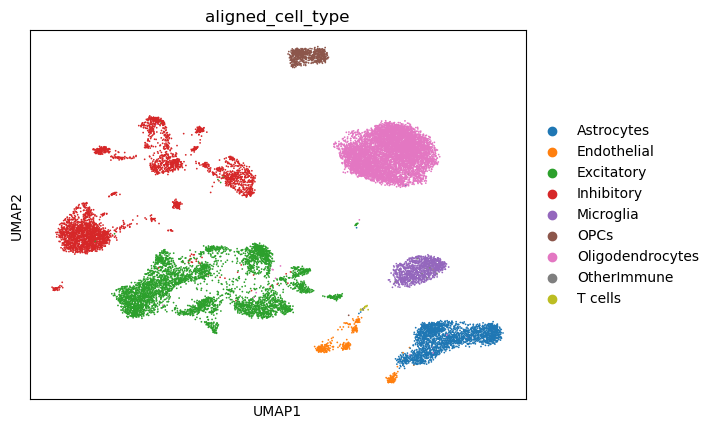

In [16]:
diverse_cohort_subset = diverse_cohort[diverse_cohort.obs.sample(frac=0.01, random_state=42).index].copy()
sc.pp.normalize_total(diverse_cohort_subset)
sc.pp.log1p(diverse_cohort_subset)
sc.pp.pca(diverse_cohort_subset)
sc.pp.neighbors(diverse_cohort_subset)
sc.tl.umap(diverse_cohort_subset)
sc.pl.umap(diverse_cohort_subset, color = 'aligned_cell_type', save = '_diverse_cohort.pdf')

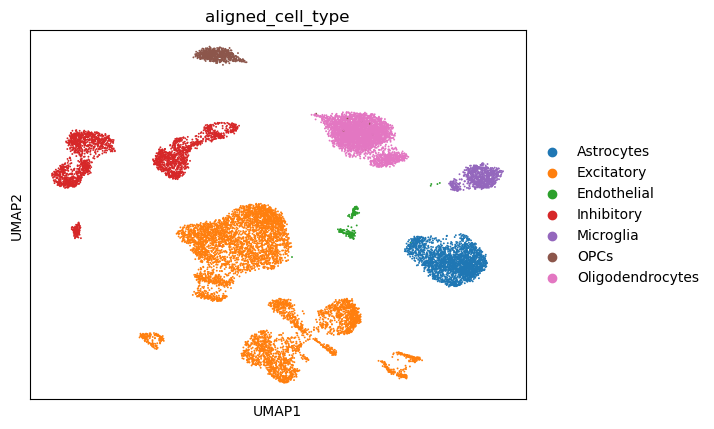

In [17]:
rosmap_subset = rosmap[rosmap.obs.sample(frac=0.01, random_state=42).index].copy()
sc.pp.normalize_total(rosmap_subset)
sc.pp.log1p(rosmap_subset)
sc.pp.pca(rosmap_subset)
sc.pp.neighbors(rosmap_subset)
sc.tl.umap(rosmap_subset)
sc.pl.umap(rosmap_subset, color = 'aligned_cell_type', save = '_rosmap.pdf')

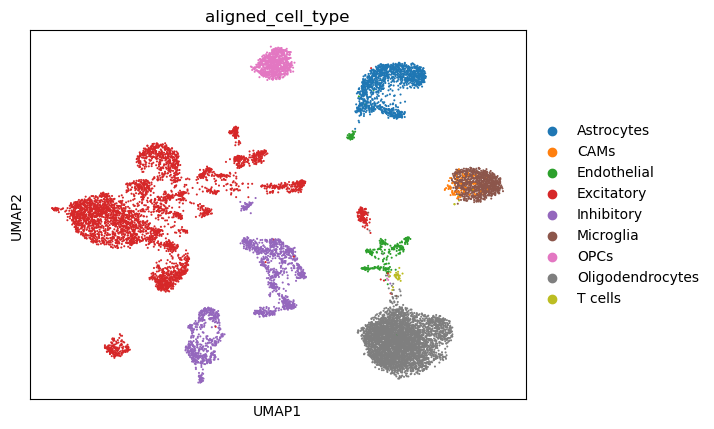

In [18]:
multi_region_subset = multi_region[multi_region.obs.sample(frac=0.01, random_state=42).index].copy()
sc.pp.normalize_total(multi_region_subset)
sc.pp.log1p(multi_region_subset)
sc.pp.pca(multi_region_subset)
sc.pp.neighbors(multi_region_subset)
sc.tl.umap(multi_region_subset)
sc.pl.umap(multi_region_subset, color = 'aligned_cell_type', save = '_multi_region.pdf')

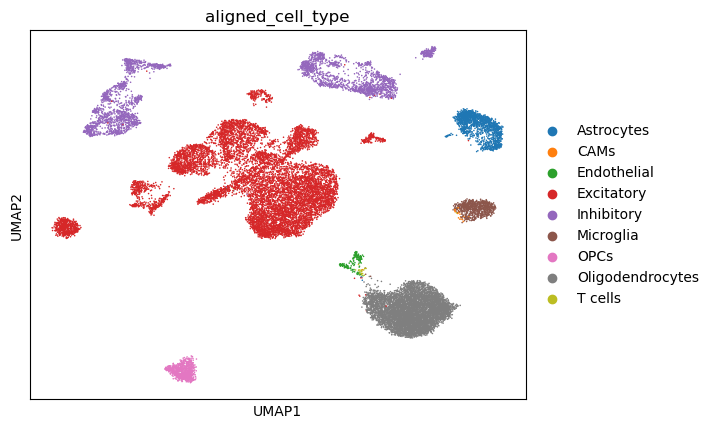

In [19]:
aging_subset = aging[aging.obs.sample(frac=0.01, random_state=42).index].copy()
sc.pp.normalize_total(aging_subset)
sc.pp.log1p(aging_subset)
sc.pp.pca(aging_subset)
sc.pp.neighbors(aging_subset)
sc.tl.umap(aging_subset)
sc.pl.umap(aging_subset, color = 'aligned_cell_type', save = '_aging.pdf')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


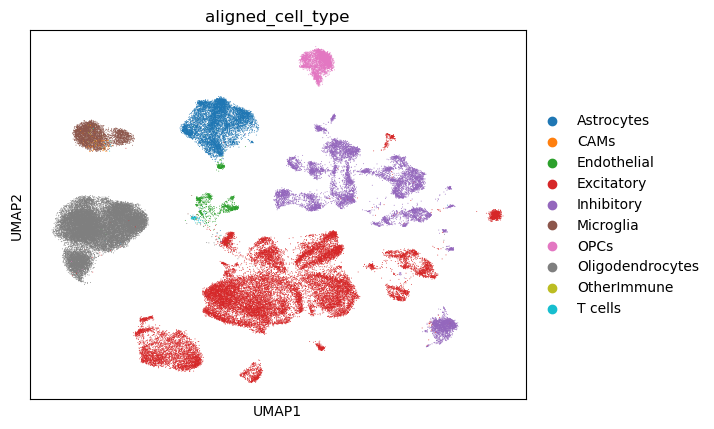

In [10]:
adata_subset = adata[adata.obs.sample(frac=0.01, random_state=42).index].copy()
sc.pp.normalize_total(adata_subset)
sc.pp.log1p(adata_subset)
sc.pp.pca(adata_subset)
sc.pp.neighbors(adata_subset)
sc.tl.umap(adata_subset)
sc.pl.umap(adata_subset, color = 'aligned_cell_type', save = '_all.pdf')

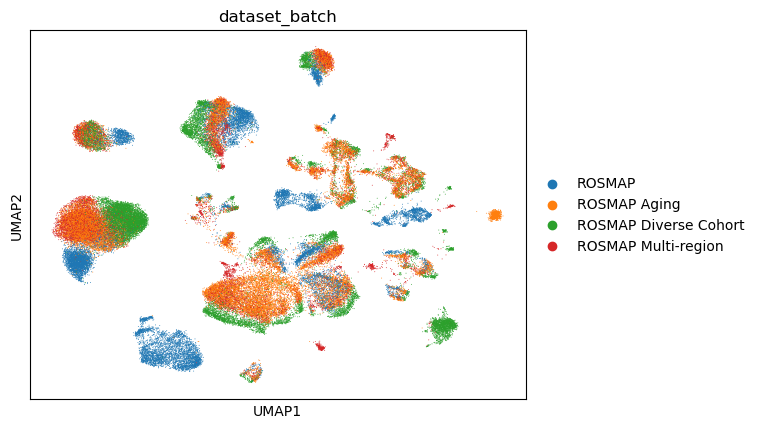

In [12]:
sc.pl.umap(adata_subset, color = 'dataset_batch')

In [ ]:
sc.pl.umap(adata, color = ['aligned_cell_type', 'AD'])

In [ ]:
adata.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/rosmap_everything_not_integrated_hvg_aligned.h5ad')